Columns in the dataset:
 Index(['Name', 'Aired Date', 'Year of release', 'Original Network', 'Aired On',
       'Number of Episodes', 'Duration', 'Content Rating', 'Rating',
       'Synopsis', 'Genre', 'Tags', 'Director', 'Screenwriter', 'Cast',
       'Production companies', 'Rank'],
      dtype='object')
Selected Features:  ['Rating', 'Number of Episodes']
Initial Clusters:
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 2 2 2 2 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Final Clusters after 5 epochs:
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 2 2 

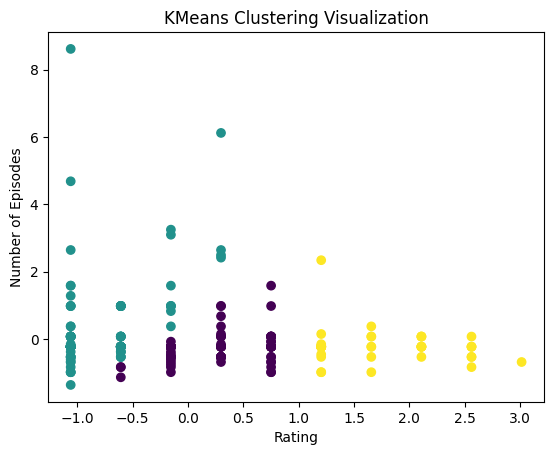

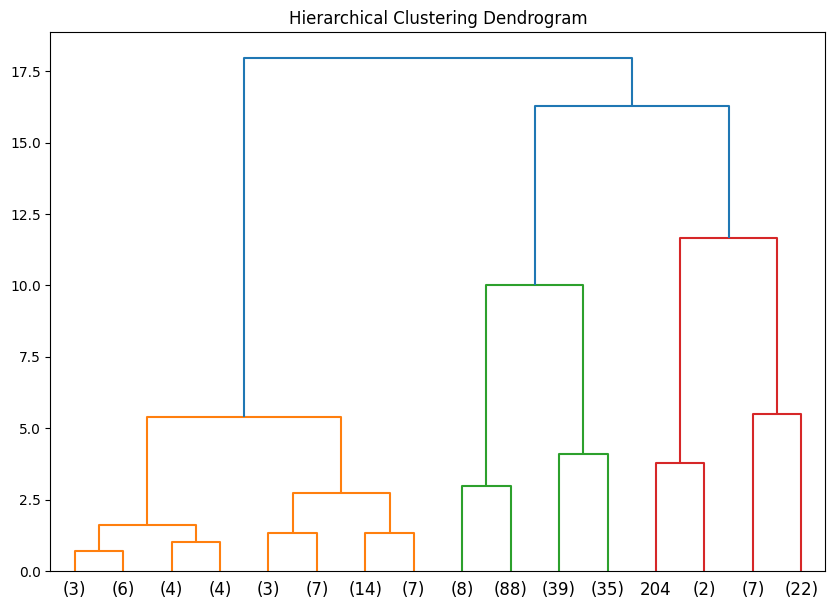

Silhouette Score: 0.34808273936548145
Enter cluster number (0 - Moderately Rated, 1 - Lower Rated, 2 - Highly Rated) to get recommendations: 2
Generating recommendations for cluster: Highly Rated

Generated Recommendations using Q-learning for Cluster Highly Rated:
                  Name  Rating  \
2   Hospital Playlist     9.1   
45    The Penthouse 2     8.8   
17       Mr. Sunshine     8.9   
25     The Red Sleeve     8.8   
11             Mother     9.0   

                                             Synopsis  
2   The stories of people going through their days...  
45  After successfully framing Oh Yoon Hee, Cheon ...  
17  Mr. Sunshine centers on a young boy born into ...  
25  In Korea during the second half of the 1700s, ...  
11  Realizing one of her students is being abused,...  


In [34]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import numpy as np
import random

# Load the dataset (Update the file path if necessary)
file_path = '/content/drive/MyDrive/Drama_List/kdrama.csv'  # Replace this with your file path
data = pd.read_csv(file_path)

# Step 1: Inspect dataset columns
print("Columns in the dataset:\n", data.columns)

# Step 2: Choose relevant features for clustering based on your dataset
features = ['Rating', 'Number of Episodes']  # Update this based on your needs
print("Selected Features: ", features)

# Step 3: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Step 4: KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can change the number of clusters
kmeans.fit(scaled_data)

# Initial clusters
initial_clusters = kmeans.labels_
print("Initial Clusters:\n", initial_clusters)

# Step 5: Find final clusters and error rate
epochs = kmeans.n_iter_
final_clusters = kmeans.labels_
error_rate = kmeans.inertia_  # Sum of squared distances to the closest centroid

print(f"Final Clusters after {epochs} epochs:\n", final_clusters)
print(f"Error Rate: {error_rate}")

# Step 6: Visualizing KMeans Clustering
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=final_clusters, cmap='viridis')
plt.title("KMeans Clustering Visualization")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()

# Step 7: Hierarchical Clustering
Z = linkage(scaled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=3, labels=data.index)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# Silhouette Score to check clustering quality
sil_score = silhouette_score(scaled_data, final_clusters)
print(f"Silhouette Score: {sil_score}")

# Define moods for clusters
cluster_moods = {0: 'Moderately Rated', 1: 'Lower Rated', 2: 'Highly Rated'}

# QLearningPlaylist class definition
class QLearningPlaylist:
    def __init__(self, data, cluster, n_dramas=5):
        self.data = data
        self.cluster = cluster
        self.n_dramas = n_dramas
        self.q_table = {}  # Initialize Q-table for state-action pairs

    def initialize_q_table(self):
        """Initialize Q-table for each drama with random Q-values."""
        for drama_id in self.data.index:
            self.q_table[drama_id] = random.uniform(0, 1)  # Random Q-value initialization

    def update_q_value(self, drama_id, reward, learning_rate=0.1, discount_factor=0.95):
        """Update Q-values using the Q-learning formula."""
        old_q_value = self.q_table[drama_id]
        max_next_q = max(self.q_table.values())  # Max future reward
        # Q-learning update rule
        self.q_table[drama_id] = old_q_value + learning_rate * (reward + discount_factor * max_next_q - old_q_value)

    def generate_recommendation(self):
        """Generate a list of top K-Dramas using Q-learning."""
        self.initialize_q_table()
        recommended_dramas = []
        available_dramas = list(self.data[final_clusters == self.cluster].index)  # Available dramas in the cluster

        for _ in range(self.n_dramas):
            if not available_dramas:
                break  # Stop if no more dramas are available

            # Select drama with max Q-value from the available dramas
            best_drama_id = max(available_dramas, key=lambda x: self.q_table[x])
            recommended_dramas.append(best_drama_id)

            # Remove the selected drama from available dramas to avoid repetition
            available_dramas.remove(best_drama_id)

            # Simulate user feedback (like = +1 reward, dislike = -1 reward)
            feedback = random.choice([1, -1])  # Simulated feedback
            self.update_q_value(best_drama_id, reward=feedback)

        recommendations = self.data.loc[recommended_dramas][['Name', 'Rating', 'Synopsis']]
        return recommendations

# Example usage:
user_input_cluster = int(input("Enter cluster number (0 - Moderately Rated, 1 - Lower Rated, 2 - Highly Rated) to get recommendations: "))
mood = cluster_moods.get(user_input_cluster, "Unknown Cluster")
print(f"Generating recommendations for cluster: {mood}")

# Q-learning based recommendations
q_learning = QLearningPlaylist(data, user_input_cluster)
q_learning_recommendations = q_learning.generate_recommendation()
print(f"\nGenerated Recommendations using Q-learning for Cluster {mood}:\n", q_learning_recommendations)
